In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files/wines_clean.csv', index_col=0)
df.head()

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,año
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,NaN
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,NaN
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,NaN
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,NaN
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,NaN


## El Ranking del 'Vino-Plomo' 
    
    - ¿Quién Trae la Siesta?

    - Objetivo: Identificar las regiones españolas con el potencial de pesadez promedio más alto

- Un IP Alto significa "Vino-Plomo" (Alto Cuerpo - Baja Acidez).
- Un IP Bajo significa "Despertador Líquido" (Bajo Cuerpo - Alta Acidez).

In [3]:
# Calcular el IP (Indice de pesadez del vino)
df['IP'] = df['cuerpo'] - df['acidez']

In [4]:
# Calcular el IP promedio por región
df_ip_region = df.groupby('region')['IP'].mean().sort_values(ascending=False).reset_index()

/var/folders/c1/ydglxbrj501f7jnfm5wt4y9h0000gp/T/ipykernel_80836/1817133782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IP', y='region', data=df_ip_region.head(10), palette='Reds_d');


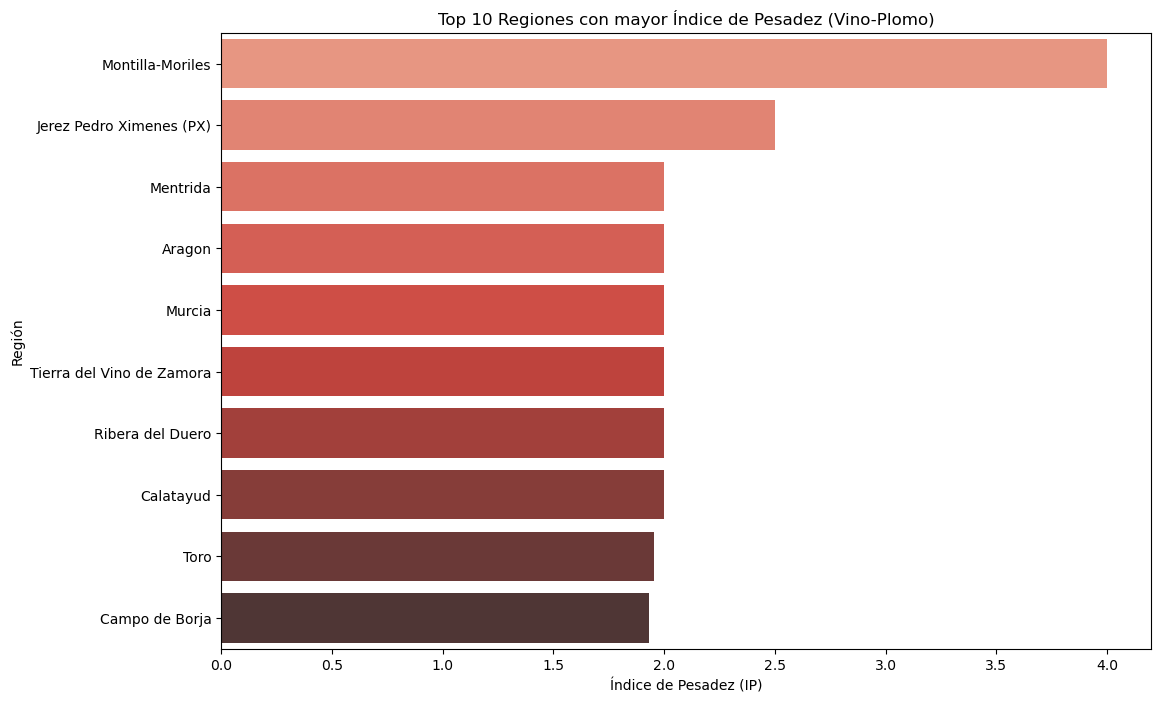

In [5]:
# Visualización (simplificada: gráfico de barras Top 10)
plt.figure(figsize=(12, 8));
sns.barplot(x='IP', y='region', data=df_ip_region.head(10), palette='Reds_d');
plt.title("Top 10 Regiones con mayor Índice de Pesadez (Vino-Plomo)");
plt.xlabel("Índice de Pesadez (IP)");
plt.ylabel("Región");

    - En future warning es porque usé el eje 'Y' en vez de 'HUE', pero de esa manera se ven las barras pegadas y no se aprecia bien.

## La Inversión Cuestionable (La Estafa)

    - La Estafa del Siglo: ¿Pagarías $500 por un 3.5/5?

    - Objetivo: Resaltar los outliers-- vinos caros con una calificación muy baja (dolor de cabeza monetario)

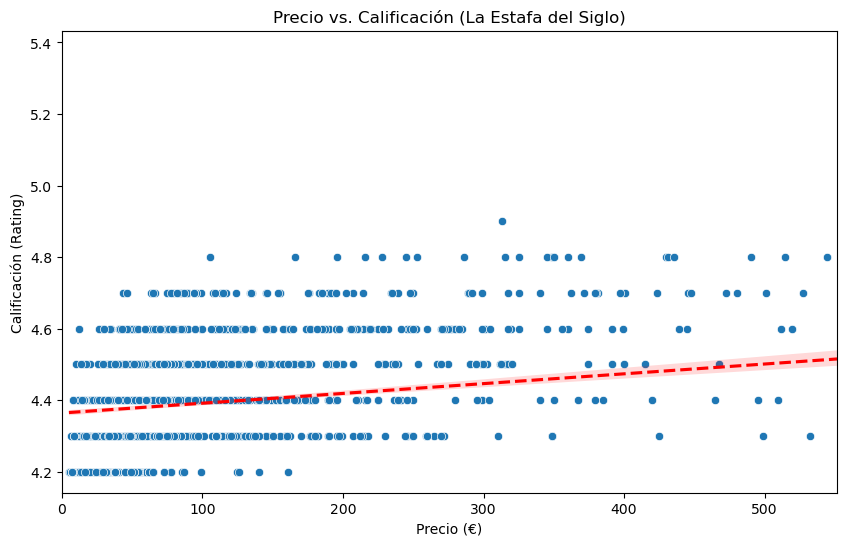

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precio', y='calificacion', data=df)

#linea de tendencia
sns.regplot(x='precio', y='calificacion', data=df, scatter=False, color='red', line_kws={'linestyle':'--'});

plt.title("Precio vs. Calificación (La Estafa del Siglo)");
plt.xlabel("Precio (€)");
plt.ylabel("Calificación (Rating)");
plt.xlim(0, df['precio'].quantile(0.95)); # Limitar el eje X para mejor visualización


### Vinos de más de 100 euros con una calificación de menos de 5? mmmmmm--

## Vinos Matusalén (El Factor Temporal)

    - Vinos Matusalén: ¿Siguen Vivos o Son Historia?

    - Objetivo: Mostrar la longevidad y el rating de las cosechas más antiguas

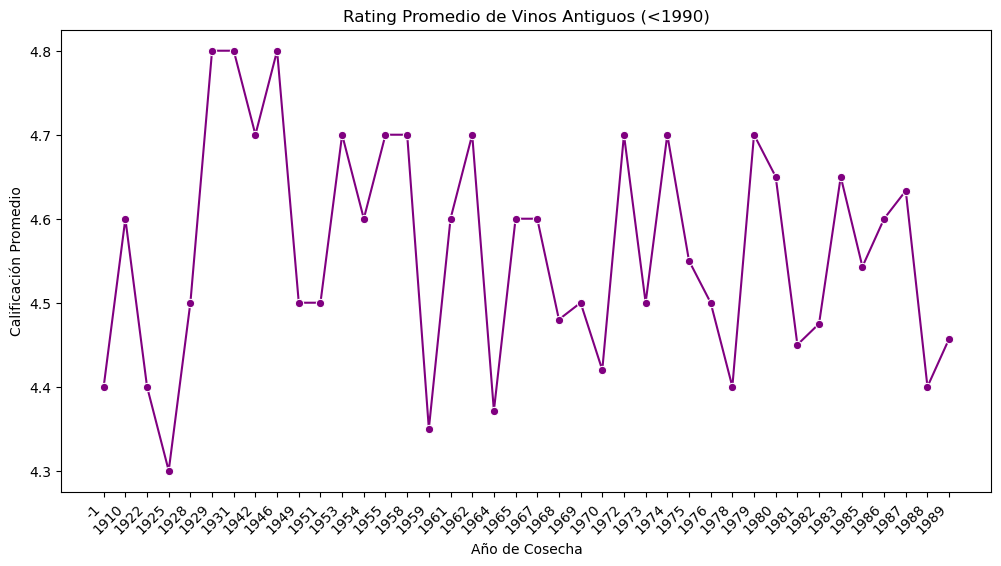

In [8]:
# Cosechas de antes de 1990 y con al menos 10 reseñas
df_antiguos = df[df['anio'] < '1990']
df_antiguos = df_antiguos[df_antiguos['num_resenas'] > 10]

# Calcular el rating promedio por año
df_rating_year = df_antiguos.groupby('anio')['calificacion'].mean().reset_index()

plt.figure(figsize=(12, 6));
sns.lineplot(x='anio', y='calificacion', data=df_rating_year, marker='o', color='purple');
plt.xticks(rotation=45, ha='right');
plt.title("Rating Promedio de Vinos Antiguos (<1990)");
plt.xlabel("Año de Cosecha");
plt.ylabel("Calificación Promedio");


### Análisis:

- Picos Altos (1931, 1942, 1964, 1974, 1980): Años de cosecha legendarios. Estos vinos no solo han sobrevivido, sino que mantienen una calificación promedio de 4.7/4.8

        Esto nos dice que la longevidad está ligada a la calidad inicial. Si un vino de esta cosecha sobrevive, es probable que haya sido muy bueno desde el principio

- Valles Bajos (1928, 1959, 1979): cosechas difíciles o de peor reputación. Vinos de estas épocas tienen calificaciones promedio más cercanas a 4.3/4.4

        Confirma que el tiempo no perdona la mala calidad

- El Primer Dato (-1): valor atìpico, arreglar

- El Final (1987-1989): ligera caida al final del gráfico. 

        Sugiere que los vinos más "jóvenes" en esta categoría antigua aún no han sido plenamente probados o que las cosechas no fueron tan buens como las de 1985

## El 'Despertador Líquido' (La Cura)

    - El 'Despertador Líquido: Vinos que Te Reviven.
    
    - Objetivo: Identificar los vinos de alta calidad que tienen un IP bajo (frescos y seguros)

/var/folders/c1/ydglxbrj501f7jnfm5wt4y9h0000gp/T/ipykernel_80836/409081125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score_cura', y='vino', data=df_top_cura, palette='Greens_d');


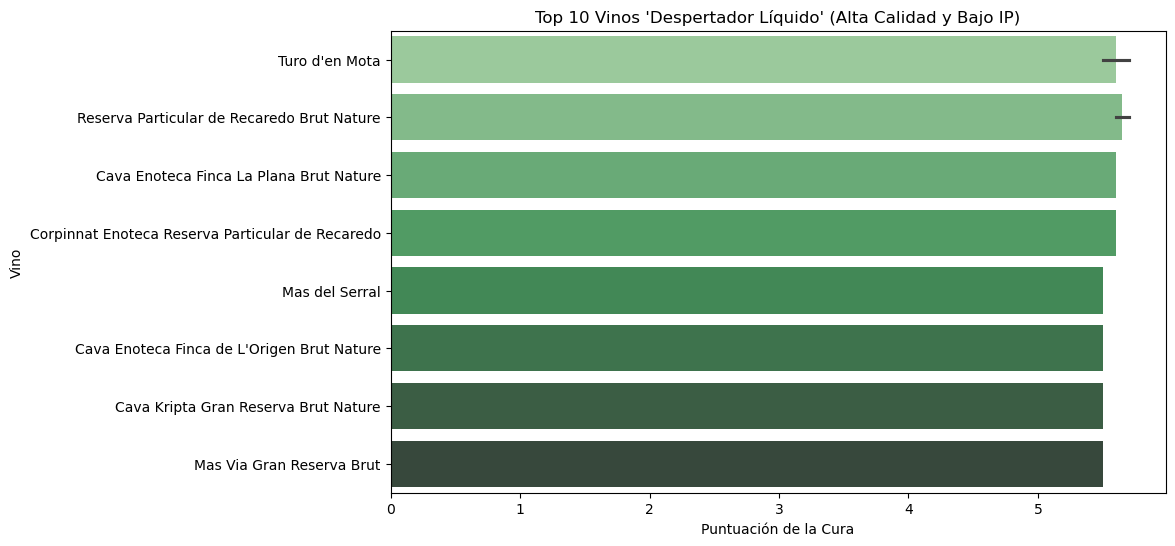

In [9]:
# Filtrar vinos con buen rating (ej. > 4.2) y IP bajo (ej. IP < 0)
df_cura = df[(df['calificacion'] > 4.2) & (df['IP'] < 0)].copy()

# Ordenar por el mejor rating y el IP más bajo
df_cura['score_cura'] = df_cura['calificacion'] - df_cura['IP'] # Prioriza alto rating y bajo IP
df_top_cura = df_cura.sort_values(by='score_cura', ascending=False).head(10)


plt.figure(figsize=(10, 6));
sns.barplot(x='score_cura', y='vino', data=df_top_cura, palette='Greens_d');
plt.title("Top 10 Vinos 'Despertador Líquido' (Alta Calidad y Bajo IP)");
plt.xlabel("Puntuación de la Cura");
plt.ylabel("Vino");


## El Amor No Correspondido (Ignorados)

    - El Amor No Correspondido: Vinos Buenos, Pero Ignorados

    - Objetivo: Resaltar vinos con alto rating pero bajo número de reseñas

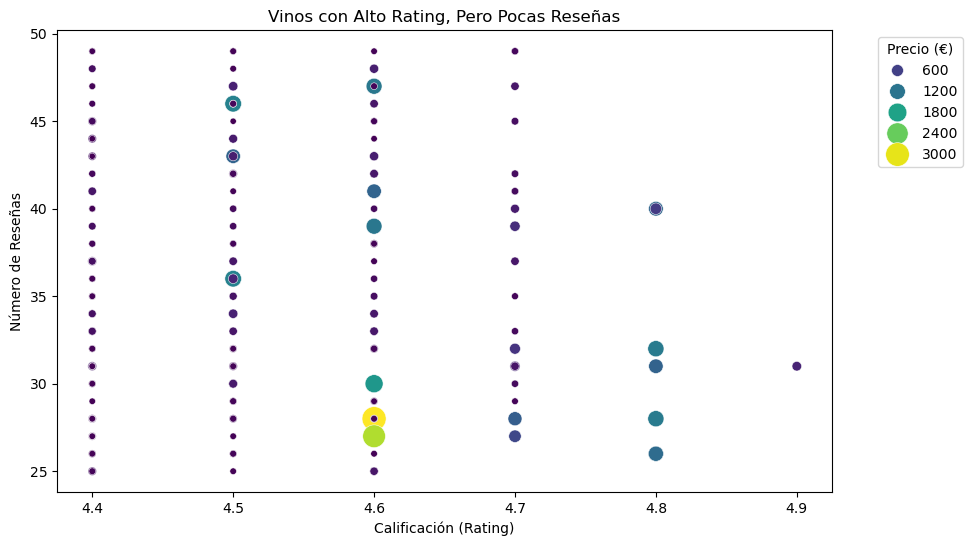

In [10]:
# Filtrar vinos con alto rating (>4.3) y bajo número de reseñas (<50)
df_ignorados = df[(df['calificacion'] > 4.3) & (df['num_resenas'] < 50)]

plt.figure(figsize=(10, 6));
sns.scatterplot(x='calificacion', y='num_resenas', size='precio', data=df_ignorados, sizes=(20, 300), hue='precio', palette='viridis');

plt.title("Vinos con Alto Rating, Pero Pocas Reseñas");
plt.xlabel("Calificación (Rating)");
plt.ylabel("Número de Reseñas");
plt.legend(title='Precio (€)', bbox_to_anchor=(1.05, 1), loc='upper left');

## Análisis:

- Cerca de 50 resñas: los vinos  que están a punto de volverse populares. Son los menos "ignorados" de este grupo; la gente ya los está descubriendo.

- Crca de 25 reseñas: Las verdaderas joyas ocultas. Tienen la misma alta calidad (mismo eje X) pero han sido reseñados por menos de 30 personas.

- Vinos de alto precio (Burbujas Amarillas/Grandes): Un vino con un rating de $4.6$ y solo 28 reseñas (punto amarillo) es un vino de nicho muy exclusivo. El bajo número de reseñas es una barrera por su precio (por encima de $2400€$).

        - No es ignorado por accidente, sino por su exclusividad y precio

- Vinos de bajo precio(Burbujas Moradas/Pequeñas):  Un vino con un rating de $4.4$ y 40 reseñas (puntos pequeños/oscuros). Son vinos de alta calidad que, si bien son accesibles ($600€$), el público no ha corrido la voz.

        - Son la compra más inteligente dentro de los "ignorados"

- El Punto Extremo (4.9 Rating): hay un punto en el extremo derecho con pocas reseñas (4.9), ese es el santo grial. La máxima calidad con el menor conocimiento del mercado.
